# Heart Failure Prediction

# 🔎 Dataset Overview

## 💾 The data

The data comes from 'Heart Failure Prediction Dataset' from Kaggle, available in `'heart.csv'`.

#### Each row represents a single people:
- **`Age`** : age of the patient [years]
- **`Sex`** : sex of the patient [M: Male, F: Female]
- **`ChestPainType`** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **`RestingBP`** : resting blood pressure [mm Hg]
- **`Cholesterol`** : serum cholesterol [mm/dl]
- **`FastingBS`** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **`RestingECG`** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **`MaxHR`** : maximum heart rate achieved [Numeric value between 60 and 202]
- **`ExerciseAngina`** : exercise-induced angina [Y: Yes, N: No]
- **`Oldpeak`** : oldpeak = ST [Numeric value measured in depression]
- **`ST_Slope`** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **`HeartDisease`** : output class [1: heart disease, 0: Normal]


## Classification: Which demographic, clinical, and exercise-related features are the most significant predictors of heart disease?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import seaborn as sns

In [2]:
# Loading the Data
heart_df = pd.read_csv("../../TeamProject/data/raw/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Inspect the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Cheking unique values in HeartDisease column
heart_df['HeartDisease'].unique()

array([0, 1])

In [5]:
# Checking Missing Values
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#Checking for duplicates 
heart_df.duplicated().sum()

0

In [22]:
heart_df.groupby(['HeartDisease']).size()

HeartDisease
0    410
1    508
dtype: int64

In [8]:
heart_normal = heart_df[heart_df['HeartDisease']==0]
heart_normal_female = heart_normal[heart_normal['Sex']=='F']
heart_normal_male = heart_normal[heart_normal['Sex']=='M']

heart_disease = heart_df[heart_df['HeartDisease']==1]
heart_disease_female = heart_disease[heart_disease['Sex']=='F']
heart_disease_male = heart_disease[heart_disease['Sex']=='M']

In [9]:
heart_df.groupby('RestingECG').size()

RestingECG
LVH       188
Normal    552
ST        178
dtype: int64

In [10]:
#Proportion by gender
heart_female = heart_df[heart_df['Sex']=='F']
heart_male = heart_df[heart_df['Sex']=='M']

female = 100*heart_female.groupby('HeartDisease').size()/heart_female.shape[0]
male = 100*heart_male.groupby('HeartDisease').size()/heart_male.shape[0]

#Proportion by ChestPainType
heart_TA = heart_df[heart_df['ChestPainType']=='TA']
heart_NAP = heart_df[heart_df['ChestPainType']=='NAP']
heart_ATA = heart_df[heart_df['ChestPainType']=='ATA']
heart_ASY = heart_df[heart_df['ChestPainType']=='ASY']

TA = 100*heart_TA.groupby('HeartDisease').size()/heart_TA.shape[0]
NAP = 100*heart_NAP.groupby('HeartDisease').size()/heart_NAP.shape[0]
ATA = 100*heart_ATA.groupby('HeartDisease').size()/heart_ATA.shape[0]
ASY = 100*heart_ASY.groupby('HeartDisease').size()/heart_ASY.shape[0]

#Proportion by Resting ECG

heart_LVH = heart_df[heart_df['RestingECG']=='LVH']
heart_ECGNormal = heart_df[heart_df['RestingECG']=='Normal']
heart_ST = heart_df[heart_df['RestingECG']=='ST']

LVH = 100*heart_LVH.groupby('HeartDisease').size()/heart_LVH.shape[0]
ECGNormal = 100*heart_ECGNormal.groupby('HeartDisease').size()/heart_ECGNormal.shape[0]
ST = 100*heart_ST.groupby('HeartDisease').size()/heart_ST.shape[0]

#Proportion by ExerciseAngina

heart_ExerciseAngina_y = heart_df[heart_df['ExerciseAngina']=='Y']
heart_ExerciseAngina_n = heart_df[heart_df['ExerciseAngina']=='N']

ExerciseAngina_y = 100*heart_ExerciseAngina_y.groupby('HeartDisease').size()/heart_ExerciseAngina_y.shape[0]
ExerciseAngina_n = 100*heart_ExerciseAngina_n.groupby('HeartDisease').size()/heart_ExerciseAngina_n.shape[0]

#Proportion by ST_Slope

heart_STSlope_up = heart_df[heart_df['ST_Slope']=='Up']
heart_STSlope_flat = heart_df[heart_df['ST_Slope']=='Flat']
heart_STSlope_down = heart_df[heart_df['ST_Slope']=='Down']

STSlope_up = 100*heart_STSlope_up.groupby('HeartDisease').size()/heart_STSlope_up.shape[0]
STSlope_flat = 100*heart_STSlope_flat.groupby('HeartDisease').size()/heart_STSlope_flat.shape[0]
STSlope_down = 100*heart_STSlope_down.groupby('HeartDisease').size()/heart_STSlope_down.shape[0]

#Proportion by FastingBS

heart_fastingBS_high = heart_df[heart_df['FastingBS']==1]
heart_fastingBS_low = heart_df[heart_df['FastingBS']==0]

fastingBS_high = 100*heart_fastingBS_high.groupby('HeartDisease').size()/heart_fastingBS_high.shape[0]
fastingBS_low = 100*heart_fastingBS_low.groupby('HeartDisease').size()/heart_fastingBS_low.shape[0]


In [41]:
STSlope_up

HeartDisease
0    80.253165
1    19.746835
dtype: float64

In [11]:
heart_df.groupby(['FastingBS', 'HeartDisease']).size()

FastingBS  HeartDisease
0          0               366
           1               338
1          0                44
           1               170
dtype: int64

In [12]:
import pandas as pd

# Creating a DataFrame with proportions
proportion_table = pd.DataFrame({
    "Category": ["Female", "Male", 
                 "ChestPain-TA", "ChestPain-NAP", "ChestPain-ATA", "ChestPain-ASY", 
                 "RestingECG-LVH", "RestingECG-Normal", "RestingECG-ST", 
                 "ExerciseAngina-Yes", "ExerciseAngina-No",
                 "ST Slope-Up", "ST Slope-Flat", "ST Slope-Down",
                 "FastingBS-High", "FastingBS-Low"],
    "Normal (0)": [female.get(0, 0), male.get(0, 0), 
                   TA.get(0, 0), NAP.get(0, 0), ATA.get(0, 0), ASY.get(0, 0),
                   LVH.get(0, 0), ECGNormal.get(0, 0), ST.get(0, 0), 
                   ExerciseAngina_n.get(0, 0), ExerciseAngina_y.get(0,0), 
                   STSlope_up.get(0,0), STSlope_flat.get(0,0), STSlope_down.get(0,0),
                   fastingBS_high.get(0,0), fastingBS_low.get(0,0)],

    "Heart Disease (1)": [female.get(1, 0), male.get(1, 0), 
                          TA.get(1, 0), NAP.get(1, 0), ATA.get(1, 0), ASY.get(1, 0),
                          LVH.get(1, 0), ECGNormal.get(1, 0), ST.get(1, 0),
                          ExerciseAngina_n.get(1.0), ExerciseAngina_y.get(1,0), 
                          STSlope_up.get(1,0), STSlope_flat.get(1,0), STSlope_down.get(1,0),
                          fastingBS_high.get(1,0), fastingBS_low.get(1,0)]
})

proportion_table


,Category,Normal (0),Heart Disease (1)
0,Female,74.093264,25.906736
1,Male,36.827586,63.172414
2,ChestPain-TA,56.521739,43.478261
3,ChestPain-NAP,64.532020,35.467980
4,ChestPain-ATA,86.127168,13.872832
5,ChestPain-ASY,20.967742,79.032258
6,RestingECG-LVH,43.617021,56.382979
7,RestingECG-Normal,48.369565,51.630435
8,RestingECG-ST,34.269663,65.730337
9,ExerciseAngina-Yes,64.899452,35.100548


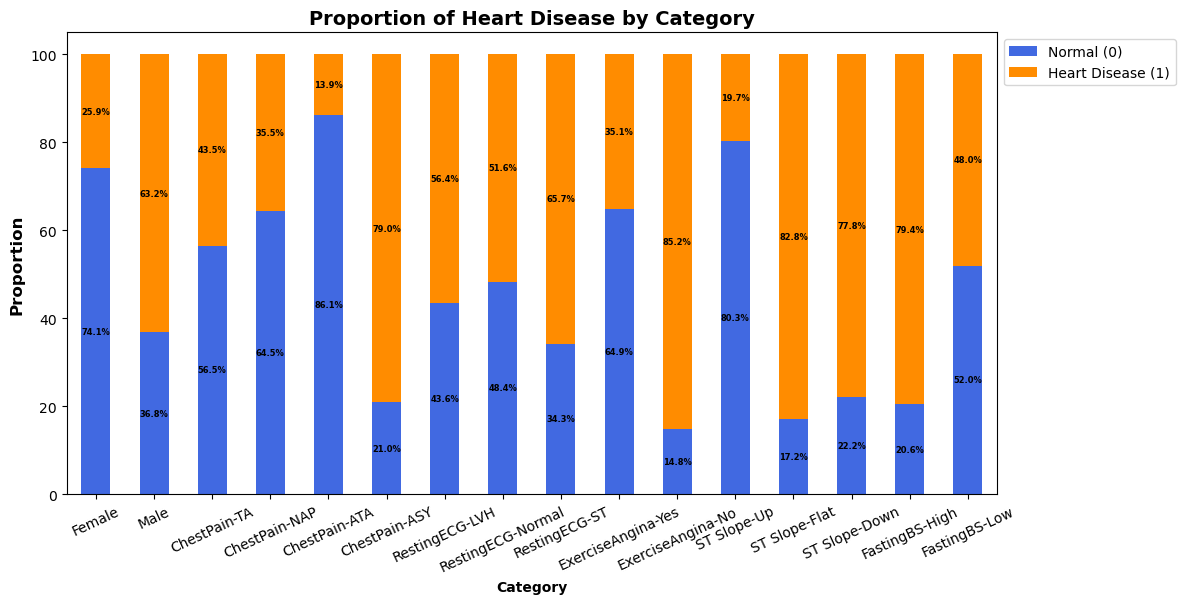

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

proportion_table.index = ["Female", "Male", 
                 "ChestPain-TA", "ChestPain-NAP", "ChestPain-ATA", "ChestPain-ASY", 
                 "RestingECG-LVH", "RestingECG-Normal", "RestingECG-ST", 
                 "ExerciseAngina-Yes", "ExerciseAngina-No",
                 "ST Slope-Up", "ST Slope-Flat", "ST Slope-Down",
                 "FastingBS-High", "FastingBS-Low"]

# Plot stacked bar chart
proportion_table.plot(kind='bar', stacked=True, ax=ax, color=["royalblue", "darkorange"])

# Add percentage labels to each segment
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=6, weight="bold")

# Customize labels and title
plt.xlabel("Category", fontsize=10, fontweight="bold")
plt.ylabel("Proportion", fontsize=12, fontweight="bold")

plt.title("Proportion of Heart Disease by Category", fontsize=14, fontweight="bold")
plt.legend(title="Heart Disease", labels=["Normal", "Heart Disease"]) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) 
plt.xticks(rotation=25)  

plt.show()




In [14]:
heart_df.groupby(['Age', 'Sex'])['RestingBP'].mean().reset_index()

,Age,Sex,RestingBP
0,28,M,130.000000
1,29,M,130.000000
2,30,F,170.000000
3,31,F,100.000000
4,31,M,120.000000
...,...,...,...
86,74,M,145.500000
87,75,M,155.333333
88,76,F,140.000000
89,76,M,104.000000


In [24]:
heart_normal.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#ST_Slope by Up, Flat and Down - Heart Disease

ST_up_disease = heart_disease[heart_disease['ST_Slope']=='Up']
ST_flat_disease = heart_disease[heart_disease['ST_Slope']=='Flat']
ST_down_disease = heart_disease[heart_disease['ST_Slope']=='Down']

#ST_Slope by Up, Flat and Down - Without Heart Disease

ST_up_normal = heart_normal[heart_normal['ST_Slope']=='Up']
ST_flat_normal = heart_normal[heart_normal['ST_Slope']=='Flat']
ST_down_normal = heart_normal[heart_normal['ST_Slope']=='Down']




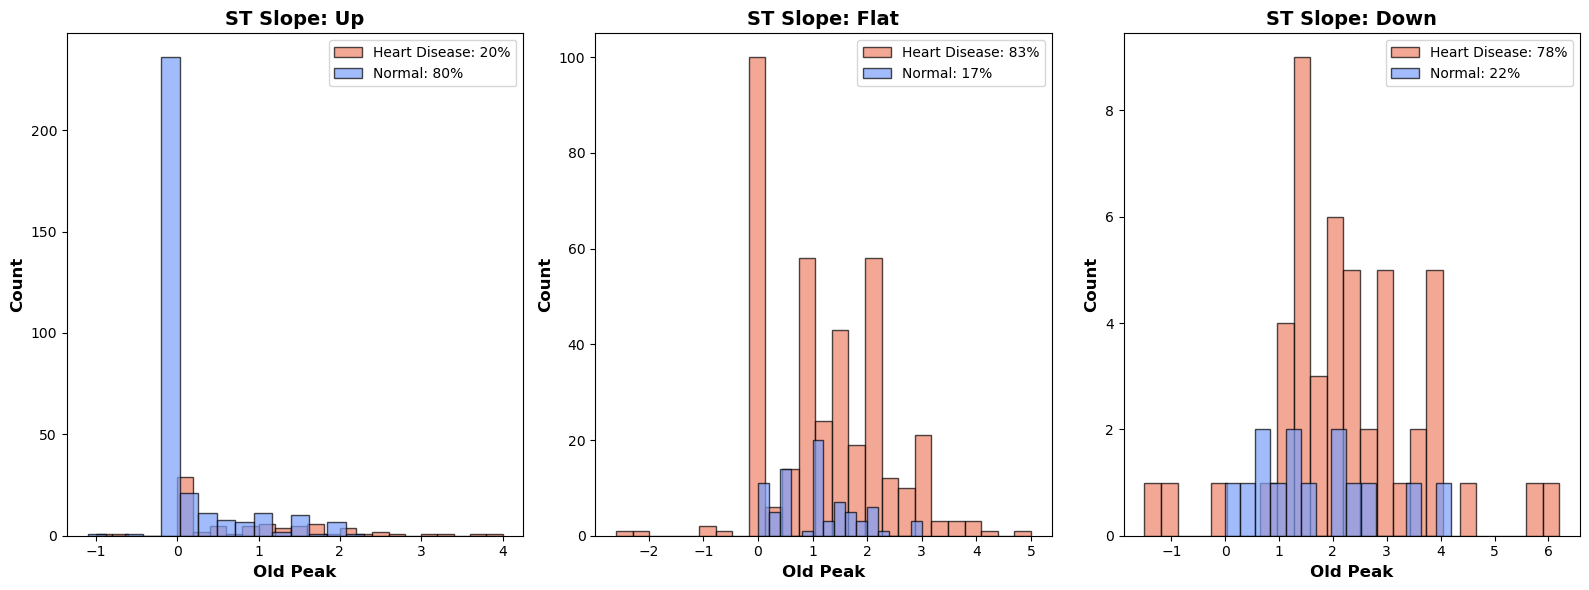

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(16, 6)) 

# Define the coolwarm color map
cmap = plt.cm.coolwarm

#---------UP---------#
# Normalize the data to map the palette correctly
axes[0].hist(ST_up_disease['Oldpeak'], bins=25, alpha=0.7, color=cmap(0.8), edgecolor='black', label=f'Heart Disease: {STSlope_up.get(1, 0):.0f}%')
axes[0].hist(ST_up_normal['Oldpeak'], bins=15, alpha=0.7, color=cmap(0.2), edgecolor='black', label=f'Normal: {STSlope_up.get(0, 0):.0f}%')

# Labels & title
axes[0].set_xlabel('Old Peak', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('ST Slope: Up', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)

#---------FLAT---------#
axes[1].hist(ST_flat_disease['Oldpeak'], bins=25, alpha=0.7, color=cmap(0.8), edgecolor='black', label=f'Heart Disease: {STSlope_flat.get(1, 0):.0f}%')
axes[1].hist(ST_flat_normal['Oldpeak'], bins=15, alpha=0.7, color=cmap(0.2), edgecolor='black', label=f'Normal: {STSlope_flat.get(0, 0):.0f}%')

# Labels & title
axes[1].set_xlabel('Old Peak', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('ST Slope: Flat', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)

#---------DOWN---------#
axes[2].hist(ST_down_disease['Oldpeak'], bins=25, alpha=0.7, color=cmap(0.8), edgecolor='black', label=f'Heart Disease: {STSlope_down.get(1, 0):.0f}%')
axes[2].hist(ST_down_normal['Oldpeak'], bins=15, alpha=0.7, color=cmap(0.2), edgecolor='black', label=f'Normal: {STSlope_down.get(0, 0):.0f}%')

# Labels & title
axes[2].set_xlabel('Old Peak', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[2].set_title('ST Slope: Down', fontsize=14, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=10)


plt.tight_layout()


## Resting Blood Pressure [mm Hg]

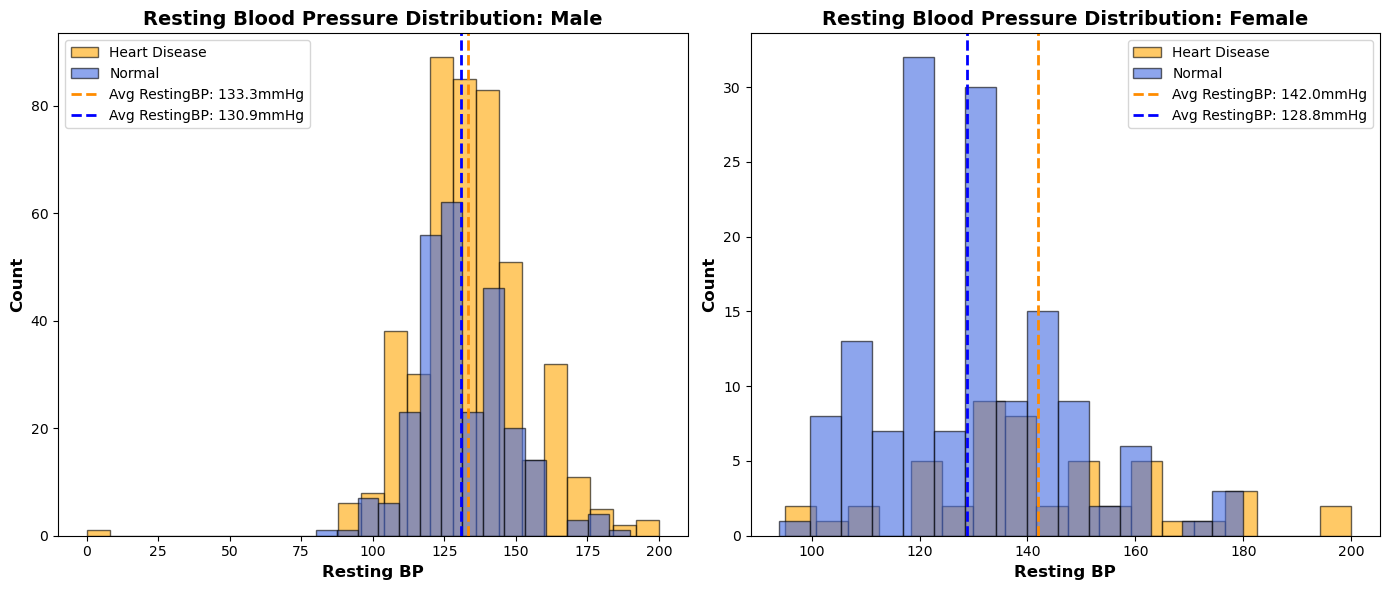

In [15]:
import matplotlib.pyplot as plt

avg_restingBP_female_disease= heart_disease_female['RestingBP'].mean()
avg_restingBP_female_normal= heart_normal_female['RestingBP'].mean()

avg_restingBP_male_disease= heart_disease_male['RestingBP'].mean()
avg_restingBP_male_normal= heart_normal_male['RestingBP'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# ---- Male Resting BP Distribution ----
axes[0].hist(heart_disease_male['RestingBP'], bins=25, alpha=0.6, color='orange', edgecolor='black', label='Heart Disease')
axes[0].hist(heart_normal_male['RestingBP'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average RestingBP
axes[0].axvline(x=avg_restingBP_male_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_male_disease:.1f}mmHg")
axes[0].axvline(x=avg_restingBP_male_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_male_normal:.1f}mmHg")

# Labels & title
axes[0].set_xlabel('Resting BP', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Resting Blood Pressure Distribution: Male', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=10)

# ---- Female Resting BP Distribution ----
axes[1].hist(heart_disease_female['RestingBP'], bins=18, alpha=0.6, color='orange', edgecolor='black', label='Heart Disease')
axes[1].hist(heart_normal_female['RestingBP'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average RestingBP
axes[1].axvline(x=avg_restingBP_female_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_female_disease:.1f}mmHg")
axes[1].axvline(x=avg_restingBP_female_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg RestingBP: {avg_restingBP_female_normal:.1f}mmHg")

# Labels & title
axes[1].set_xlabel('Resting BP', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Resting Blood Pressure Distribution: Female', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)

# Adjust layout
plt.tight_layout()  # Prevent overlap
plt.show()


## Cholesterol: serum cholesterol [mm/dl]

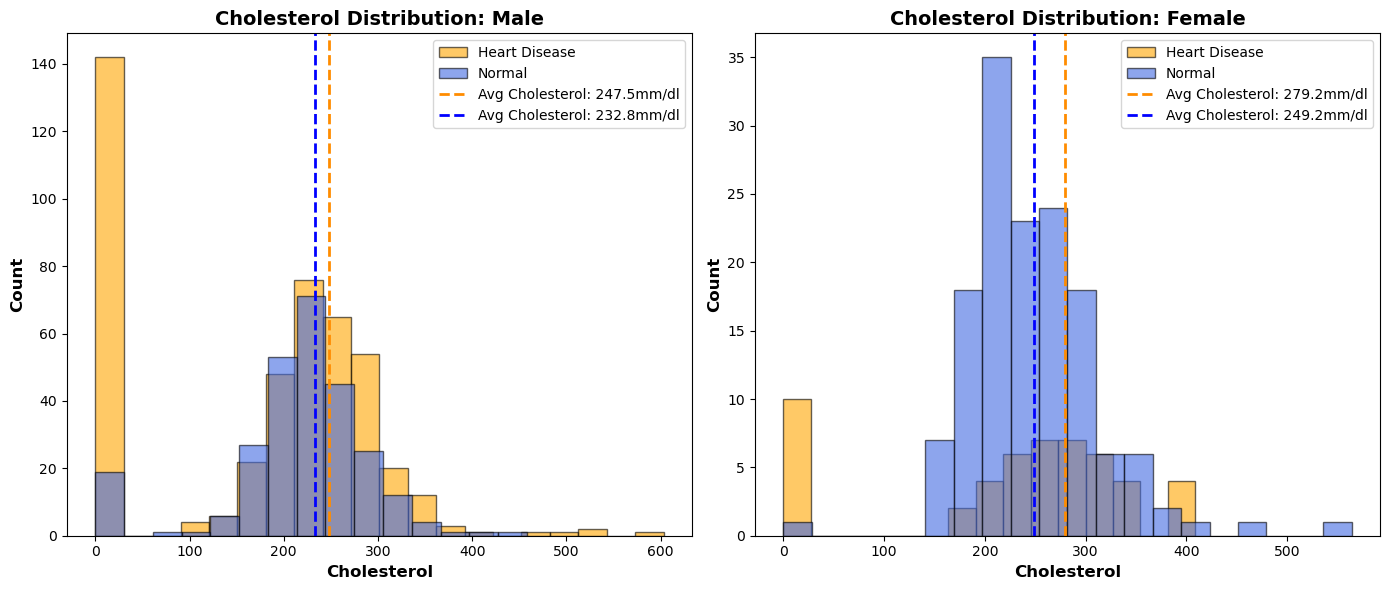

In [16]:
import matplotlib.pyplot as plt

# Average cholesterol excluding values of cholesterol = 0
avg_cholesterol_female_disease= heart_disease_female[heart_disease_female['Cholesterol'] != 0]['Cholesterol'].mean()
avg_cholesterol_female_normal= heart_normal_female[heart_normal_female['Cholesterol'] != 0]['Cholesterol'].mean()

avg_cholesterol_male_disease= heart_disease_male[heart_disease_male['Cholesterol'] != 0]['Cholesterol'].mean()
avg_cholesterol_male_normal= heart_normal_male[heart_normal_male['Cholesterol'] != 0]['Cholesterol'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# ---- Male cholesterol Distribution ----
axes[0].hist(heart_disease_male['Cholesterol'], bins=20, alpha=0.6, color='orange', edgecolor='black', label='Heart Disease')
axes[0].hist(heart_normal_male['Cholesterol'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average cholesterol
axes[0].axvline(x=avg_cholesterol_male_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg Cholesterol: {avg_cholesterol_male_disease:.1f}mm/dl")
axes[0].axvline(x=avg_cholesterol_male_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg Cholesterol: {avg_cholesterol_male_normal:.1f}mm/dl")

# Labels & title
axes[0].set_xlabel('Cholesterol', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Cholesterol Distribution: Male', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)

# ---- Female cholesterol Distribution ----
axes[1].hist(heart_disease_female['Cholesterol'], bins=15, alpha=0.6, color='orange', edgecolor='black', label='Heart Disease')
axes[1].hist(heart_normal_female['Cholesterol'], bins=20, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average cholesterol
axes[1].axvline(x=avg_cholesterol_female_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg Cholesterol: {avg_cholesterol_female_disease:.1f}mm/dl")
axes[1].axvline(x=avg_cholesterol_female_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg Cholesterol: {avg_cholesterol_female_normal:.1f}mm/dl")

# Labels & title
axes[1].set_xlabel('Cholesterol', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Cholesterol Distribution: Female', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)

# Adjust layout
plt.tight_layout()  # Prevent overlap
plt.show()


In [21]:
heart_df['Cholesterol'].median()

223.0

## Oldpeak: oldpeak = ST [Numeric value measured in depression] 

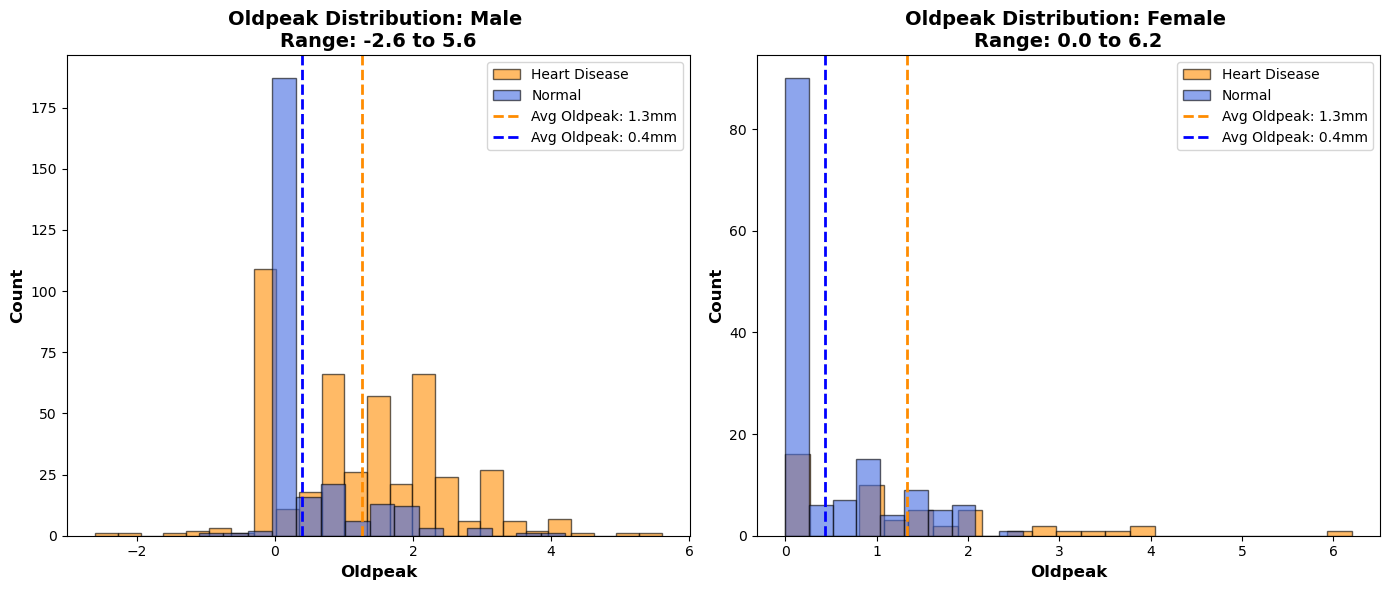

In [18]:
import matplotlib.pyplot as plt

# Average oldpeak 
avg_oldpeak_female_disease= heart_disease_female['Oldpeak'].mean()
avg_oldpeak_female_normal= heart_normal_female['Oldpeak'].mean()

avg_oldpeak_male_disease= heart_disease_male['Oldpeak'].mean()
avg_oldpeak_male_normal= heart_normal_male['Oldpeak'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# ---- Male Oldpeak Distribution ----
axes[0].hist(heart_disease_male['Oldpeak'], bins=25, alpha=0.6, color='darkorange', edgecolor='black', label='Heart Disease')
axes[0].hist(heart_normal_male['Oldpeak'], bins=15, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average Oldpeak
axes[0].axvline(x=avg_oldpeak_male_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg Oldpeak: {avg_oldpeak_male_disease:.1f}mm")
axes[0].axvline(x=avg_oldpeak_male_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg Oldpeak: {avg_oldpeak_male_normal:.1f}mm")

# Labels & title
axes[0].set_xlabel('Oldpeak', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title(f"Oldpeak Distribution: Male \nRange: {heart_male['Oldpeak'].min()} to {heart_male['Oldpeak'].max()}", fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)

# ---- Female Oldpeak Distribution ----
axes[1].hist(heart_disease_female['Oldpeak'], bins=23, alpha=0.6, color='darkorange', edgecolor='black', label='Heart Disease')
axes[1].hist(heart_normal_female['Oldpeak'], bins=10, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average Oldpeak
axes[1].axvline(x=avg_oldpeak_female_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg Oldpeak: {avg_oldpeak_female_disease:.1f}mm")
axes[1].axvline(x=avg_oldpeak_female_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg Oldpeak: {avg_oldpeak_female_normal:.1f}mm")

# Labels & title
axes[1].set_xlabel('Oldpeak', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title(f"Oldpeak Distribution: Female \nRange: {heart_female['Oldpeak'].min()} to {heart_female['Oldpeak'].max()}", fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)

# Adjust layout
plt.tight_layout()  # Prevent overlap
plt.show()

## MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

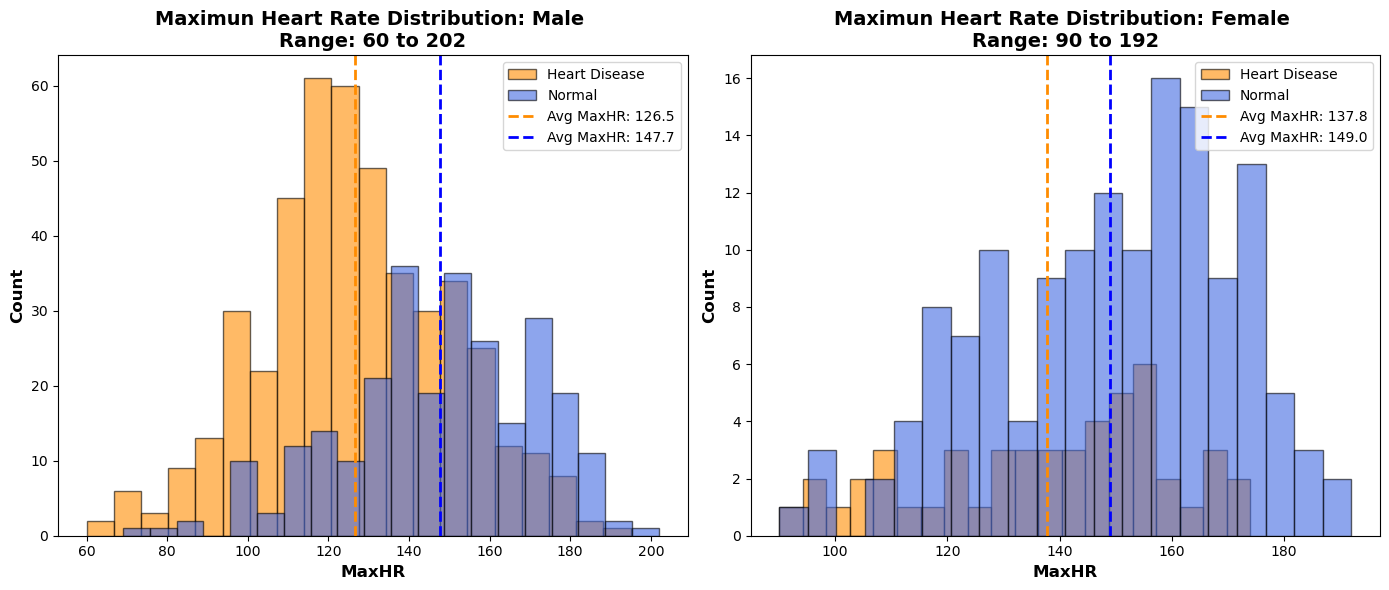

In [19]:
import matplotlib.pyplot as plt

# Average MaxHR 
avg_maxHR_female_disease= heart_disease_female['MaxHR'].mean()
avg_maxHR_female_normal= heart_normal_female['MaxHR'].mean()

avg_maxHR_male_disease= heart_disease_male['MaxHR'].mean()
avg_maxHR_male_normal= heart_normal_male['MaxHR'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# ---- Male maxHR Distribution ----
axes[0].hist(heart_disease_male['MaxHR'], bins=20, alpha=0.6, color='darkorange', edgecolor='black', label='Heart Disease')
axes[0].hist(heart_normal_male['MaxHR'], bins=20, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average maxHR
axes[0].axvline(x=avg_maxHR_male_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg MaxHR: {avg_maxHR_male_disease:.1f}")
axes[0].axvline(x=avg_maxHR_male_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg MaxHR: {avg_maxHR_male_normal:.1f}")

# Labels & title
axes[0].set_xlabel('MaxHR', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title(f"Maximun Heart Rate Distribution: Male \nRange: {heart_male['MaxHR'].min()} to {heart_male['MaxHR'].max()}", fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)

# ---- Female Oldpeak Distribution ----
axes[1].hist(heart_disease_female['MaxHR'], bins=20, alpha=0.6, color='darkorange', edgecolor='black', label='Heart Disease')
axes[1].hist(heart_normal_female['MaxHR'], bins=20, alpha=0.6, color='royalblue', edgecolor='black', label='Normal')

# Add vertical lines for average maxHR
axes[1].axvline(x=avg_maxHR_female_disease, color='darkorange', linestyle='--', linewidth=2, label=f"Avg MaxHR: {avg_maxHR_female_disease:.1f}")
axes[1].axvline(x=avg_maxHR_female_normal, color='blue', linestyle='--', linewidth=2, label=f"Avg MaxHR: {avg_maxHR_female_normal:.1f}")

# Labels & title
axes[1].set_xlabel('MaxHR', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title(f"Maximun Heart Rate Distribution: Female \nRange: {heart_female['MaxHR'].min()} to {heart_female['MaxHR'].max()}", fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)

# Adjust layout
plt.tight_layout()  # Prevent overlap
plt.show()

## Visualizing the data

The idea is to understand relationships and correlations between variables. By doing it we can gain insights into which features may contribute the most to predict a Heart Disease.

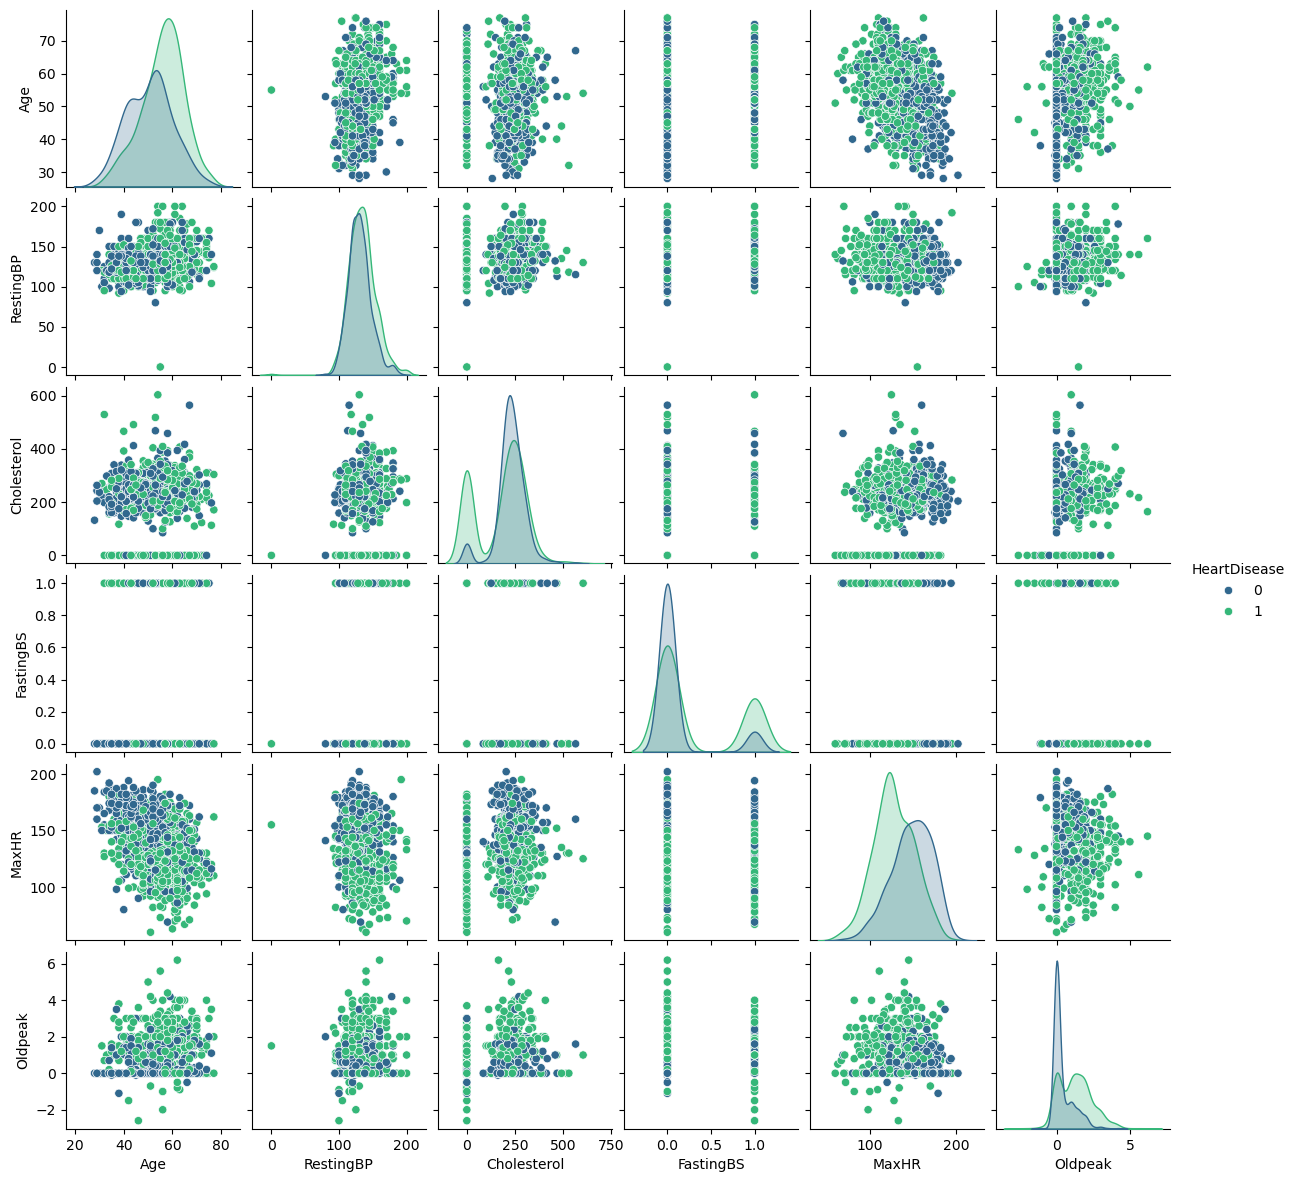

<Figure size 1500x1200 with 0 Axes>

In [20]:
# Select only numeric columns
numeric_features = heart_df.select_dtypes(include=['number']).columns

# Creates scatter plots for every combination of numerical features in the dataset
sns.pairplot(heart_df[numeric_features], hue="HeartDisease", diag_kind="kde", palette="viridis", height=2)
plt.figure(figsize=(15,12))
plt.show()
